# Introduction
Initial basic analysis of the projects training data. Prints out some info about the data.

In [10]:
import os
import pandas as pd

# Load training data and print general info about the data frame
df = pd.read_csv("../data/external/kaggle/train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


## Class Balance
A barplot of the class distribtions in the data shows which class is overrepresented and if the data set may need rebalancing. If the classes are inbalanced, some algorithms require additional preprocessing or configuration of data to get good results.

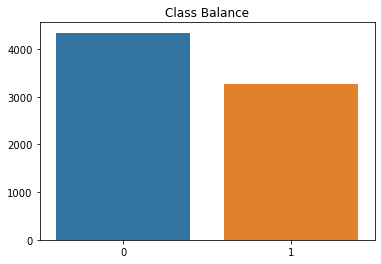

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plot class balance in training data
plt.figure()
plt.title("Class Balance")
y = df["target"]
data = {}
classes = np.unique(y)
class_distr = []
for class_label in classes:
    class_distr.append(np.sum(y == class_label))
ax = sns.barplot(x=classes, y=class_distr)


## Word Clouds
A word cloud for each class shows the words which occur the most in each class. The idea is to get a first grasp of how the words look like in different classes.

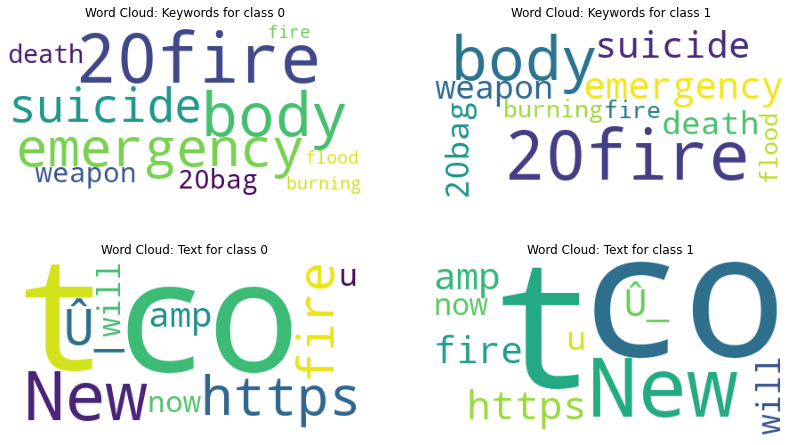

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

max_words = 10
# Plot word clouds per class
plt.figure(figsize=(14, 8))
classes = np.unique(df["target"])
for idx, c in enumerate(classes):
    sub_df = df[df["target"] == c]
    # Keyword wordcloud
    text = " ".join(df["keyword"].dropna())
    wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
    plt.subplot2grid((2, len(classes)), (0, idx))
    plt.title("Word Cloud: Keywords for class {}".format(c))
    plt.axis('off')
    plt.imshow(wordcloud_img)
    # Text wordcloud
    text = " ".join(df["text"].dropna())
    wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
    plt.subplot2grid((2, len(classes)), (1, idx))
    plt.title("Word Cloud: Text for class {}".format(c))
    plt.axis('off')
    plt.imshow(wordcloud_img)
